# Data:

### The data that will be used for this project is the "collisions" data provided by the seattle police department using recoreded Traffic Records from 2004-Present. The Meta data for this data is available from: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf. 

### For this investigation, the dependent variable will be the severity code ("SEVERITYCODE") which ranks the level of severity of a collision from 1-2. 

#### *Independent Variable selection*
The original data consisted of 38 independent variables and 194,673 incidences.However, not all of these columns in the data are relevant to the model. Columns were dropped from the data for the following reasons:
1. Due to not being necessary for model e.g. unique keys for the incidence 
2. Being related to describing the conditions of the insidence post crash which would not help with predicting the severity of a crash as this information would not be available till after a crass occured.
3. Data columns with large amounts of NaN.
4. Being a repetitive column of an already existing column.
5. Too many variations in the data column for one hot key encoding.
 
The column including the time / date/ month/ year, will be divided in to 3 different columns. The day of the week, the hour of the day, and the month. 

After this process the independent variables will be:¶
1. ADDRTYPE - Address type
2. WEATHER - Weather conditions
3. JUNCTIONTYPE - Junction type
4. ROADCOND - Road condition
5. LIGHTCOND - light condition
6. Dow - Day of week
7. Hour - Hour of day
8. Month - Month

#### *Null*
For the Null data there was an option betweem removing the missing data, replacing the missing values with the average or freuency, or leaving as is. Because there wern't that many null values, and replacing it with a average or frequent number could sqew the results, the rows with null values were removed from the data set.

the final shape of the data is (182914, 10).

#### *Normalisation of Data*
Then the data was then normalised through one hot key encoding in order for it to be fed though a machine learning algorithum. 


In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install seaborn 

You should consider upgrading via the 'c:\users\tayo\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [3]:
import seaborn as sns

In [4]:
pip install heatmapz

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: certifi>=2020.06.20 in c:\users\tayo\appdata\local\programs\python\python38-32\lib\site-packages (from matplotlib>=3.0.3->heatmapz) (2020.6.20)



You should consider upgrading via the 'c:\users\tayo\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [5]:
url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(url)

c:\users\tayo\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### For this investigation the dependent variable will be the severity code ("SEVERITYCODE") which ranks the level of severity of a collision from 1-2.

In [7]:
df[["SEVERITYCODE"]].value_counts()

SEVERITYCODE
1               136485
2                58188
dtype: int64

### The data consists of 38 independent variables and 194,673 rows. 

In [8]:
df.shape

(194673, 38)

### However, not all of these columns will be relevant to the model. Therefore, the following columns will be dropped from the data:


| Column name                             | What is it?                               | Reason for dropping     |
|---|---|---|
| OBJECTID,  COLDETKEY, SDOTCOLNUM, REPORTNO | a unique identifier/label                       | not necessary for model (However INTKEY will be kept for labeling data in case dropped data is needed for refrence later on).|
| ST_COLDESC,  SDOT_COLDESC, SDOTCOLNUM, HITPARKEDCAR, SEVERITYDESC, COLLISIONTYPE, ST_COLCODE, COLDETKEY, SPEEDING, PEDROWNOTGRNT, PERSONCOUNT, PEDCOUNT, VEHCOUNT, PEDCYLCOUNT | description of post crash (other than severity)  | Would not be useful for prediction model |
| EXCEPTRSNCODE, EXCEPTRSNDESC, STATUS            | Unclear                                   | large amount of NaN  |
|LOCATION, X, Y, CROSSWALKKEY, SEGLANEKEY | location information | Too many variations in data for one hot key encoding, can be refrenced later on 
|SEVERITYCODE.1| severity code | repetition of already existing severity code |
|INCDATE | date | information already exists in INCDTTM

In [9]:
df["CROSSWALKKEY"].value_counts()

0         190862
523609        17
520838        15
525567        13
521707        10
           ...  
521019         1
630862         1
25545          1
523322         1
27186          1
Name: CROSSWALKKEY, Length: 2198, dtype: int64

In [10]:
df["SEGLANEKEY"].value_counts()

0         191907
6532          19
6078          16
12162         15
10336         14
           ...  
35157          1
10817          1
15043          1
525169         1
16376          1
Name: SEGLANEKEY, Length: 1955, dtype: int64

In [11]:
df.drop(['OBJECTID', 'COLDETKEY', 'REPORTNO','LOCATION', 'X', 'Y','ST_COLDESC', 'SDOT_COLDESC', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SDOTCOLNUM', 'HITPARKEDCAR', 'REPORTNO', 'STATUS', 'SEVERITYDESC', 'COLLISIONTYPE', 'ST_COLCODE', 'PERSONCOUNT', 'SDOT_COLCODE','INCDATE', 'SEVERITYCODE.1','PEDROWNOTGRNT', 'SPEEDING', 'CROSSWALKKEY', 'SEGLANEKEY', 'PEDCOUNT', 'PEDCYLCOUNT', 'INATTENTIONIND', 'UNDERINFL','VEHCOUNT', 'INTKEY'], axis = 1, inplace = True)

In [12]:
df.head()

,SEVERITYCODE,INCKEY,ADDRTYPE,INCDTTM,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,1307,Intersection,3/27/2013 2:54:00 PM,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,52200,Block,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,26700,Block,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,1144,Block,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,17700,Intersection,1/28/2004 8:04:00 AM,At Intersection (intersection related),Raining,Wet,Daylight


In [13]:
df.dtypes

SEVERITYCODE     int64
INCKEY           int64
ADDRTYPE        object
INCDTTM         object
JUNCTIONTYPE    object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

### Time, Date, Month, Year
The time, date, month, year column will be devided in to hour, day of week and month as these could be used as attributes to predict the severity of a crash if there is a corellation between these variables.

First the INCDTTM attribute was converted from a string to type datetime, and then turned in to a seperate columns (hour, day of week, and month) and then was relabled. 

In [14]:
type(df['INCDTTM'][0])

str

In [15]:
df['INCDTTM']= pd.to_datetime(df['INCDTTM'])
df['INCDTTM']

0        2013-03-27 14:54:00
1        2006-12-20 18:55:00
2        2004-11-18 10:20:00
3        2013-03-29 09:26:00
4        2004-01-28 08:04:00
                 ...        
194668   2018-11-12 08:12:00
194669   2018-12-18 09:14:00
194670   2019-01-19 09:25:00
194671   2019-01-15 16:48:00
194672   2018-11-30 15:45:00
Name: INCDTTM, Length: 194673, dtype: datetime64[ns]

##### Time:

In [16]:
df['Hour'] = df['INCDTTM'].dt.hour
df['Hour']

0         14
1         18
2         10
3          9
4          8
          ..
194668     8
194669     9
194670     9
194671    16
194672    15
Name: Hour, Length: 194673, dtype: int64

In [17]:
df['Hour'] = df['Hour'].replace ({0:'Hour_1', 1:'Hour_2', 2:'Hour_3',3:'Hour_4', 4:'Hour_5',5:'Hour_6',6:'Hour_7', 7: 'Hour_8', 8: 'Hour_9', 9: 'Hour_10', 10: 'Hour_11', 11: 'Hour_12', 12: 'Hour_13', 13:'Hour_14', 14: 'Hour_15', 15: 'Hour_16', 16: 'Hour_17', 17: 'Hour_18', 18: 'Hour_19', 19: 'Hour_20', 20: 'Hour_21', 21: 'Hour_22', 22: 'Hour_23', 23: 'Hour_24'})
df['Hour']

0         Hour_15
1         Hour_19
2         Hour_11
3         Hour_10
4          Hour_9
           ...   
194668     Hour_9
194669    Hour_10
194670    Hour_10
194671    Hour_17
194672    Hour_16
Name: Hour, Length: 194673, dtype: object

#### Day of week:

In [18]:
df['Dow'] = df['INCDTTM'].dt.dayofweek
df['Dow']

0         2
1         2
2         3
3         4
4         2
         ..
194668    0
194669    1
194670    5
194671    1
194672    4
Name: Dow, Length: 194673, dtype: int64

In [19]:
df['Dow'] = df['Dow'].replace ({0:'MON', 1:'TUE', 2:'WED',3:'THUR', 4:'FRI',5:'SAT',6:'SUN'})
df['Dow']

0          WED
1          WED
2         THUR
3          FRI
4          WED
          ... 
194668     MON
194669     TUE
194670     SAT
194671     TUE
194672     FRI
Name: Dow, Length: 194673, dtype: object

#### Month:

In [20]:
df['Month'] = df['INCDTTM'].dt.month
df['Month']

0          3
1         12
2         11
3          3
4          1
          ..
194668    11
194669    12
194670     1
194671     1
194672    11
Name: Month, Length: 194673, dtype: int64

In [21]:
df['Month'] = df['Month'].replace ({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11: 'Nov', 12: 'Dec'})
df['Month']

0         Mar
1         Dec
2         Nov
3         Mar
4         Jan
         ... 
194668    Nov
194669    Dec
194670    Jan
194671    Jan
194672    Nov
Name: Month, Length: 194673, dtype: object

#### Combining to df:

In [22]:
df.drop(['INCDTTM'], axis = 1, inplace = True)
df

,SEVERITYCODE,INCKEY,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,Hour,Dow,Month
0,2,1307,Intersection,At Intersection (intersection related),Overcast,Wet,Daylight,Hour_15,WED,Mar
1,1,52200,Block,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,Hour_19,WED,Dec
2,1,26700,Block,Mid-Block (not related to intersection),Overcast,Dry,Daylight,Hour_11,THUR,Nov
3,1,1144,Block,Mid-Block (not related to intersection),Clear,Dry,Daylight,Hour_10,FRI,Mar
4,2,17700,Intersection,At Intersection (intersection related),Raining,Wet,Daylight,Hour_9,WED,Jan
...,...,...,...,...,...,...,...,...,...,...
194668,2,309534,Block,Mid-Block (not related to intersection),Clear,Dry,Daylight,Hour_9,MON,Nov
194669,1,309085,Block,Mid-Block (not related to intersection),Raining,Wet,Daylight,Hour_10,TUE,Dec
194670,2,311280,Intersection,At Intersection (intersection related),Clear,Dry,Daylight,Hour_10,SAT,Jan
194671,2,309514,Intersection,At Intersection (intersection related),Clear,Dry,Dusk,Hour_17,TUE,Jan


### NULL values

Rows with null values in them were deleted.

In [23]:
df.isnull().sum() 

SEVERITYCODE       0
INCKEY             0
ADDRTYPE        1926
JUNCTIONTYPE    6329
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
Hour               0
Dow                0
Month              0
dtype: int64

In [24]:
df.dropna (axis = 0, inplace = True)
df.shape

(182914, 10)

### *Hot key encoding*

In [25]:
df_sev = df[['SEVERITYCODE']]

df_addtype = pd.get_dummies(df["ADDRTYPE"])
df_wtr = pd.get_dummies(df["WEATHER"])
df_jt = pd.get_dummies(df["JUNCTIONTYPE"])
df_rc = pd.get_dummies(df["ROADCOND"])
df_li = pd.get_dummies(df["LIGHTCOND"])
df_dow = pd.get_dummies(df["Dow"])
df_hour = pd.get_dummies(df["Hour"])
df_month = pd.get_dummies(df["Month"])

Combined in to one data set:

In [26]:
df_addtype_s= pd.concat([df_addtype,df_sev, df_wtr, df_jt, df_rc, df_li, df_dow, df_hour, df_month],axis = 1, sort = False)
df_addtype_s

,Alley,Block,Intersection,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,2,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0,1,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
194669,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
194670,0,0,1,2,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
194671,0,0,1,2,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### *Correlation of attributes*

In [27]:
df_addtype_s.corr()

,Alley,Block,Intersection,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Alley,1.000000,-0.049156,-0.026096,-0.014447,-0.000587,-0.001282,0.000792,0.007284,-0.002974,-0.000188,...,0.002968,0.003605,-0.002631,0.000129,0.000498,0.001884,0.003737,-0.003352,-0.001870,-0.004053
Block,-0.049156,1.000000,-0.997168,-0.191389,0.004928,-0.028892,0.001703,0.022011,-0.011393,-0.002773,...,-0.009422,-0.003084,-0.003764,0.001974,0.005349,-0.008068,-0.001741,-0.006195,0.003082,0.005779
Intersection,-0.026096,-0.997168,1.000000,0.192643,-0.004888,0.029014,-0.001764,-0.022578,0.011627,0.002790,...,0.009207,0.002815,0.003965,-0.001985,-0.005391,0.007933,0.001461,0.006453,-0.002944,-0.005479
SEVERITYCODE,-0.014447,-0.191389,0.192643,1.000000,-0.001570,0.043737,0.002973,-0.021706,0.008513,0.003283,...,-0.013136,-0.009920,-0.009160,0.011267,-0.001293,-0.004056,0.007552,-0.002806,0.007573,0.003749
Blowing Sand/Dirt,-0.000587,0.004928,-0.004888,-0.001570,1.000000,-0.019893,-0.000904,-0.001048,-0.006840,-0.000086,...,-0.001118,0.010961,-0.004964,-0.002553,-0.002615,-0.001310,0.003341,0.005725,-0.001726,0.001190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mar,0.001884,-0.008068,0.007933,-0.004056,-0.001310,-0.036951,-0.013058,0.002117,0.017112,0.005989,...,-0.088749,-0.083936,-0.091436,-0.091378,-0.092193,1.000000,-0.092334,-0.092347,-0.095777,-0.090173
May,0.003737,-0.001741,0.001461,0.007552,0.003341,0.051526,-0.015134,-0.003662,-0.014972,-0.001601,...,-0.090120,-0.085232,-0.092849,-0.092790,-0.093617,-0.092334,1.000000,-0.093774,-0.097257,-0.091566
Nov,-0.003352,-0.006195,0.006453,-0.002806,0.005725,-0.125352,0.014304,0.002768,0.036099,-0.001601,...,-0.090132,-0.085244,-0.092862,-0.092802,-0.093630,-0.092347,-0.093774,1.000000,-0.097271,-0.091579
Oct,-0.001870,0.003082,-0.002944,0.007573,-0.001726,-0.056755,0.016539,-0.003378,0.020531,-0.001661,...,-0.093480,-0.088410,-0.096311,-0.096249,-0.097108,-0.095777,-0.097257,-0.097271,1.000000,-0.094980


### Correlation Matrix

In [28]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Matrix')

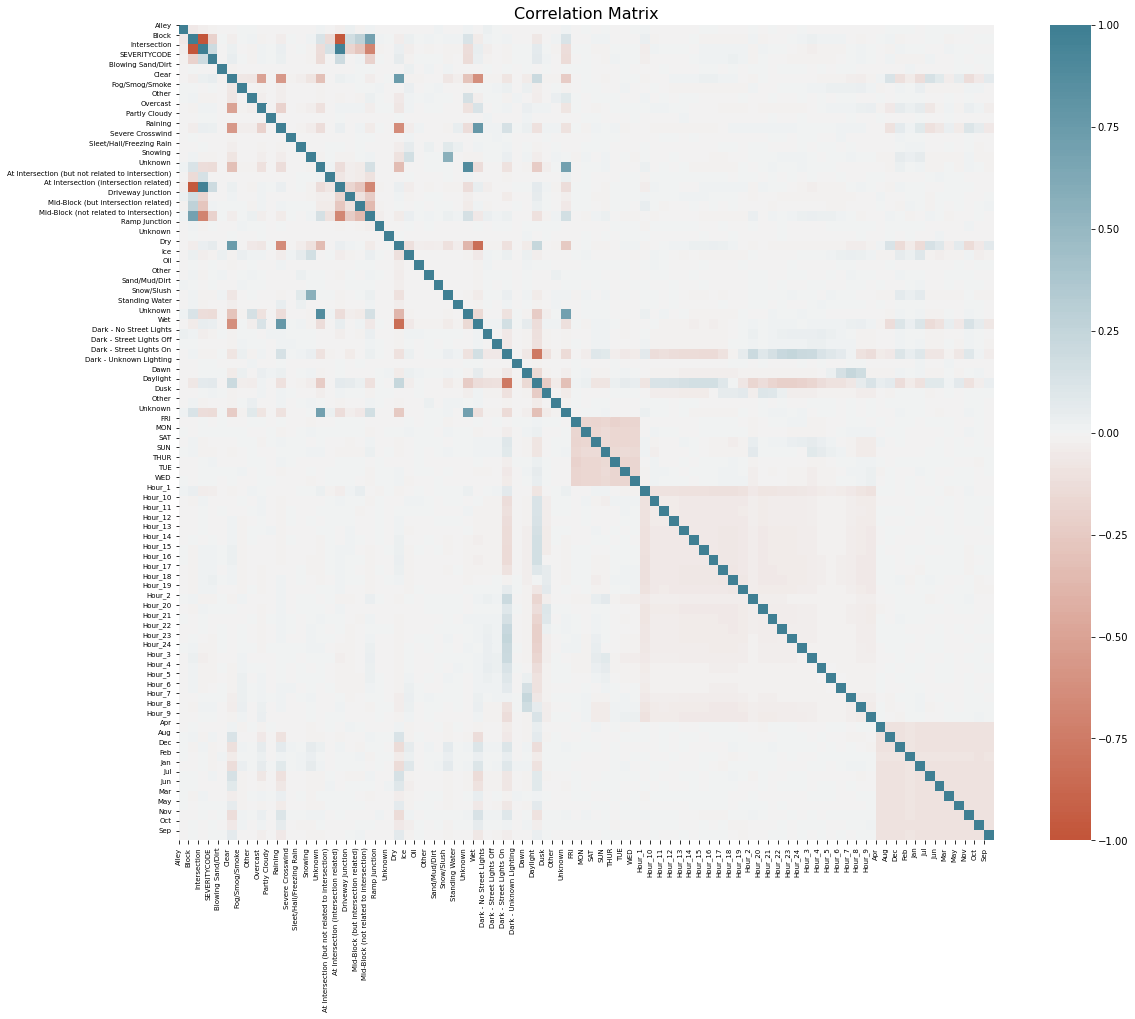

In [29]:
plt.subplots(figsize = (20,15))
corr = df_addtype_s.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.xticks(range(df_addtype_s.shape[1]), df_addtype_s.columns, fontsize=7, rotation=90)
plt.yticks(range(df_addtype_s.shape[1]), df_addtype_s.columns, fontsize=7)
ax.set_title("Correlation Matrix", fontsize = 16)